In [24]:
## Importing the libraries

import pandas as pd ## pandas is used to manipulate the dataframe
import numpy as np ## numpy is used to do scientific calculation
import matplotlib.pyplot as plt ## matplotlib is used for visualization
import seaborn as sns ## seaborn is used for visualization
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [25]:
# Import Data
dataset=pd.read_csv('insurance.csv')

In [26]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
dataset.shape

(1338, 7)

In [28]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
def missing (dataset):
 missing_number = dataset.isnull().sum().sort_values(ascending=False)
 missing_percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
 missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
 return missing_values

 #handling the missing values ## there is no missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
#Label Encoder
label_encoder = LabelEncoder()

dataset["sex"]= label_encoder.fit_transform(dataset["sex"])
dataset["sex"].unique()

dataset["smoker"]= label_encoder.fit_transform(dataset["smoker"])
dataset["smoker"].unique()

dataset["region"]= label_encoder.fit_transform(dataset["region"])
dataset["region"].unique()

array([3, 2, 1, 0])

In [32]:
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [33]:
dataset = dataset[['bmi','charges']]

<AxesSubplot: >

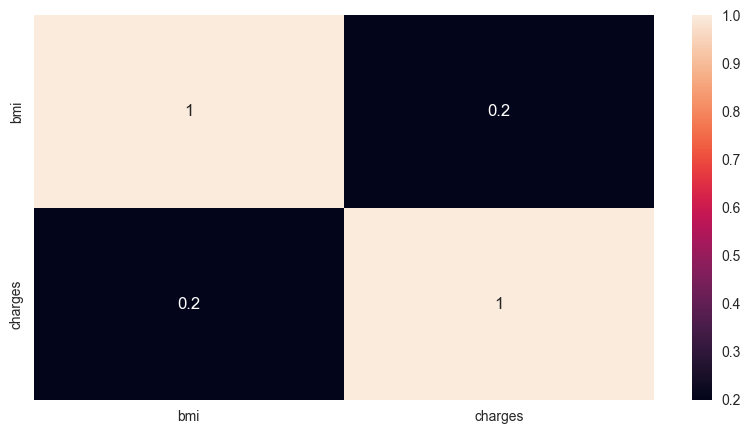

In [34]:
# Plot the correlation matrix
sns.heatmap(dataset.corr(), annot=True)

In [35]:
dataset.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


In [36]:
# defining independent and dependent variables

x=dataset.iloc[:,0:-1] # independent variables
y=dataset.charges  # dependent variable

In [37]:
x

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [39]:
# scaler = MinMaxScaler()
# x_scaled = scalwer.fit_transform(x_array)
# x_scaled

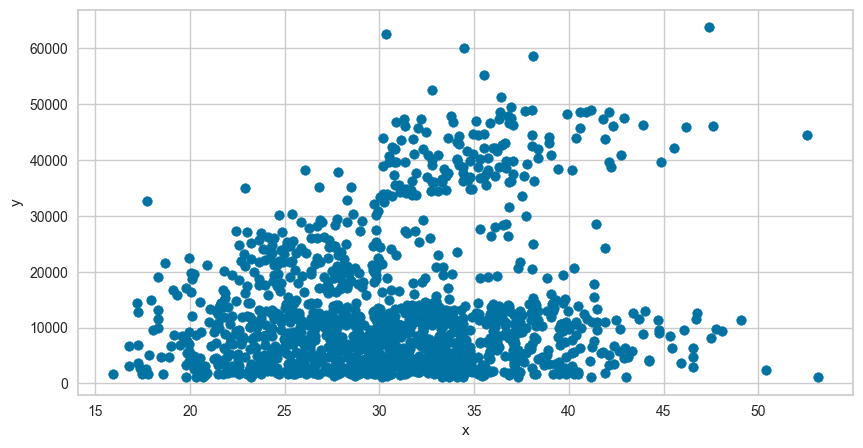

In [40]:
plt.scatter(dataset['bmi'],dataset['charges'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
X = ['bmi','charges']

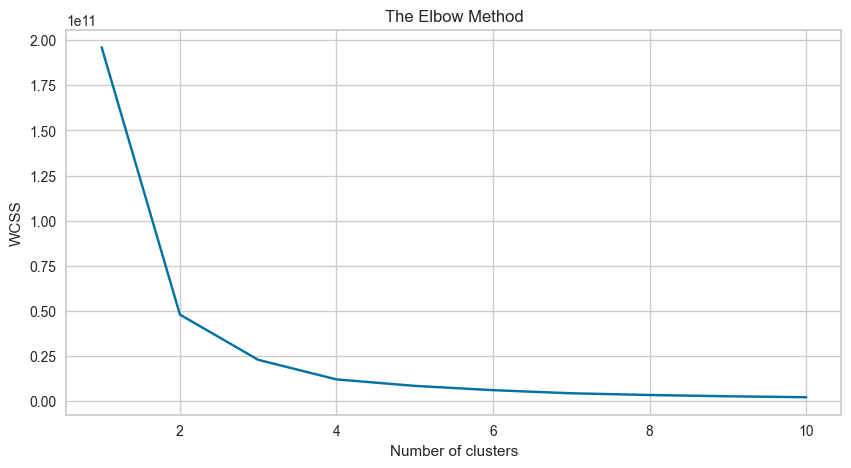

In [42]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(dataset)

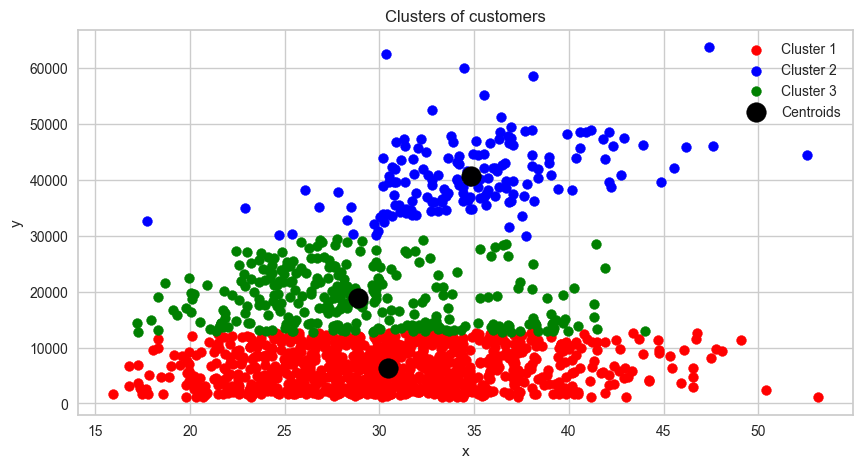

In [44]:
# Plot the clusters
plt.scatter(dataset[y_kmeans == 0]['bmi'],dataset[y_kmeans == 0]['charges'], s=50, c='red', label='Cluster 1')
plt.scatter(dataset[y_kmeans == 1]['bmi'],dataset[y_kmeans == 1]['charges'], s=50, c='blue', label='Cluster 2')
plt.scatter(dataset[y_kmeans == 2]['bmi'],dataset[y_kmeans == 2]['charges'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
# Add new column to the data
dataset['Cluster'] = y_kmeans

In [46]:
# Show the first 5 rows of the data
dataset.head(20)

,bmi,charges,Cluster
0,27.900,16884.92400,2
1,33.770,1725.55230,0
2,33.000,4449.46200,0
3,22.705,21984.47061,2
4,28.880,3866.85520,0
5,25.740,3756.62160,0
6,33.440,8240.58960,0
7,27.740,7281.50560,0
8,29.830,6406.41070,0
9,25.840,28923.13692,2


In [47]:
# Data type of the Cluster column
dataset['Cluster'].dtype

dtype('int32')

In [48]:
dataset['Cluster'].unique()

array([2, 0, 1])

Keterangan : Kalo di cluster 2 berarti medical costnya tinggi, 0 sedeng dan 1 rendah


In [49]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))